In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [39]:
from pathlib import Path
df = pd.read_excel(Path("E:/cancer/CancerPrediction0.xlsx"))
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [40]:
counts = df['LUNG_CANCER'].value_counts().sort_index()
print('Class counts (overall):', counts.to_dict())
print('YES ratio (overall) ≈', round((counts.get(1,0))/counts.sum(), 3))



Class counts (overall): {'NO': 39, 'YES': 270}
YES ratio (overall) ≈ 0.874


# **Shape**

In [41]:
df.shape

(309, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [43]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [44]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [45]:
df.duplicated().sum()

33

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.shape

(276, 16)

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [49]:
from sklearn.preprocessing import LabelEncoder
obj_cols = df.select_dtypes(include='object').columns.tolist()
if obj_cols:
    for _c in obj_cols:
        enc_tmp = LabelEncoder()
        df[_c] = enc_tmp.fit_transform(df[_c].astype(str))
    print('Encoded leftover text columns:', obj_cols)
else:
    print('No leftovers text columns.')


No leftovers text columns


In [50]:
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

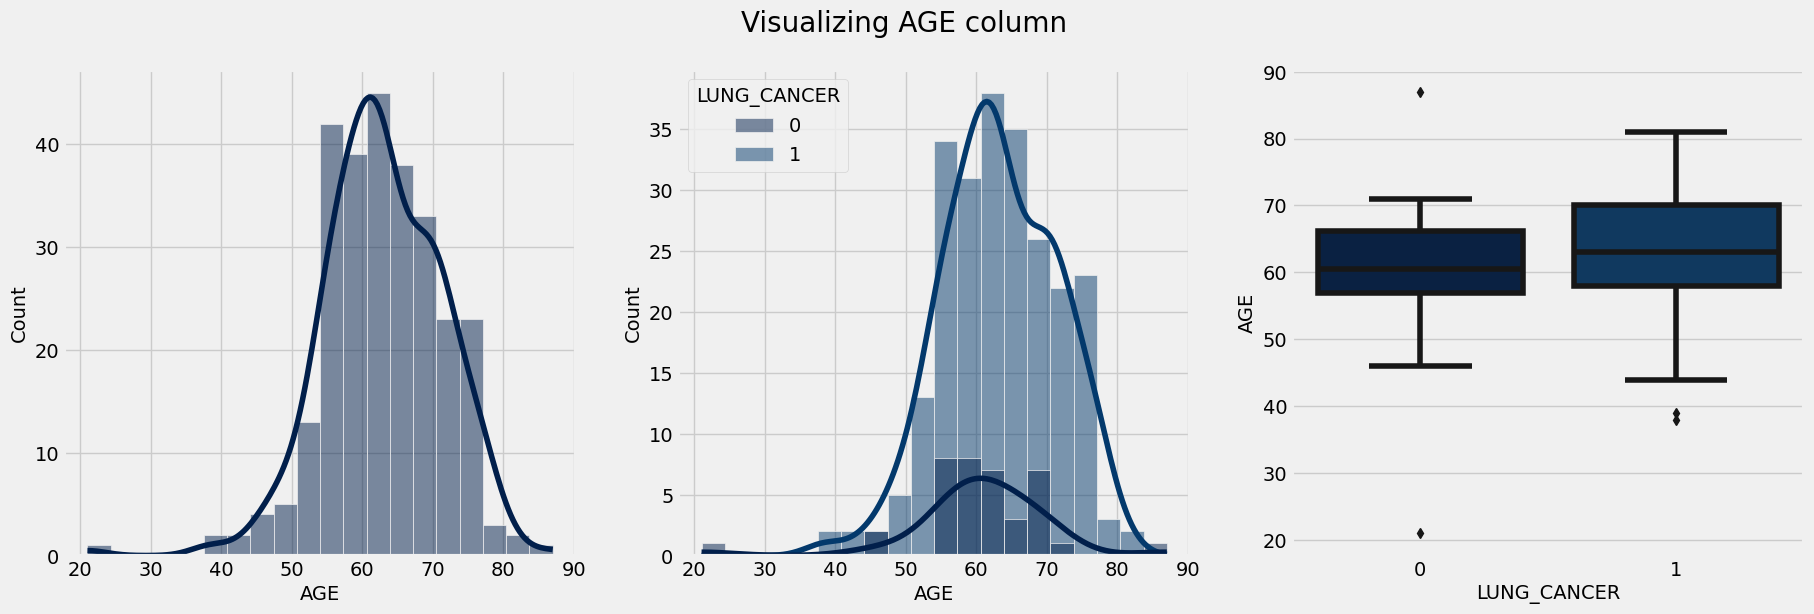

In [51]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.histplot(df['AGE'],ax=ax[0], kde=True)
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Text(0.5, 0.98, 'Visualizing Categorical Columns')

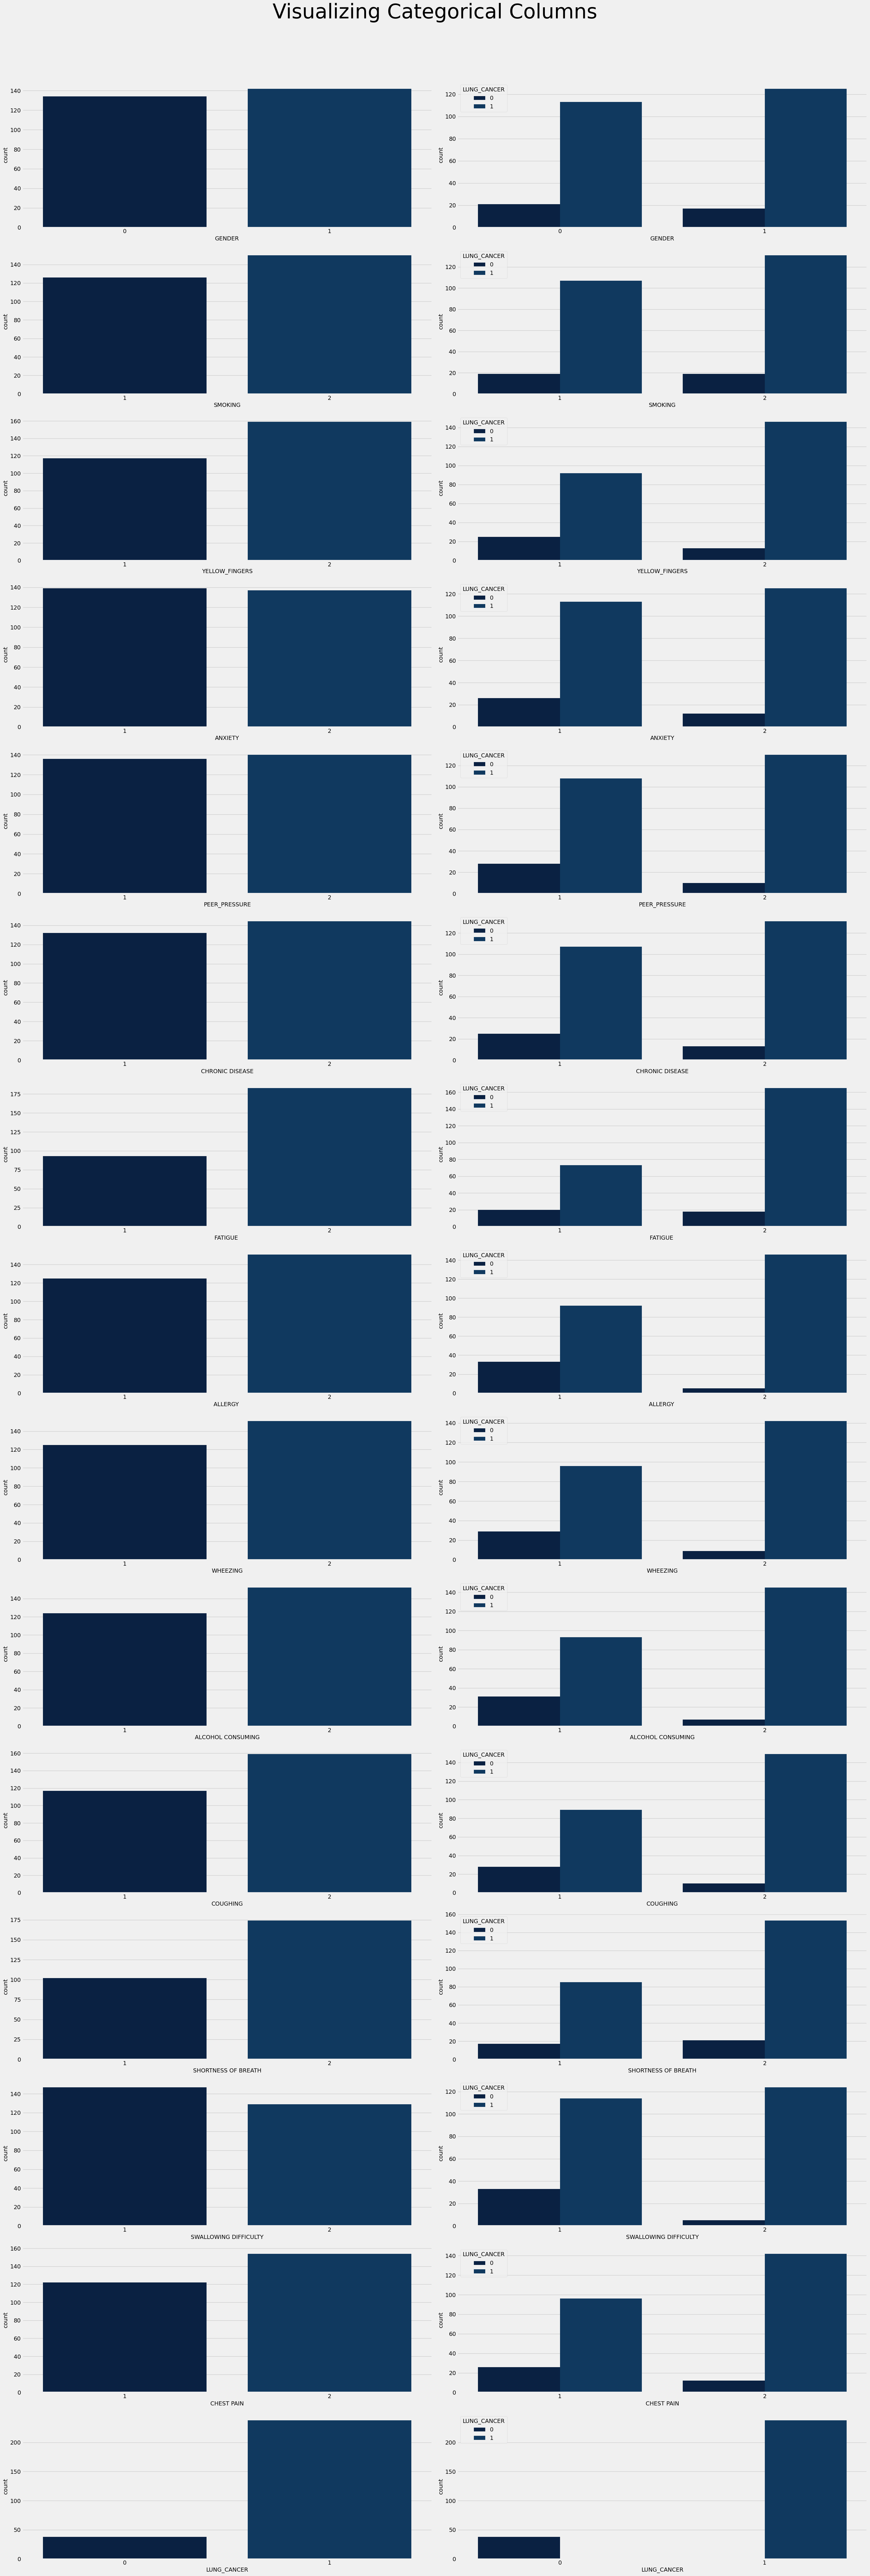

In [52]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

huge imabalance present in the dataset

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

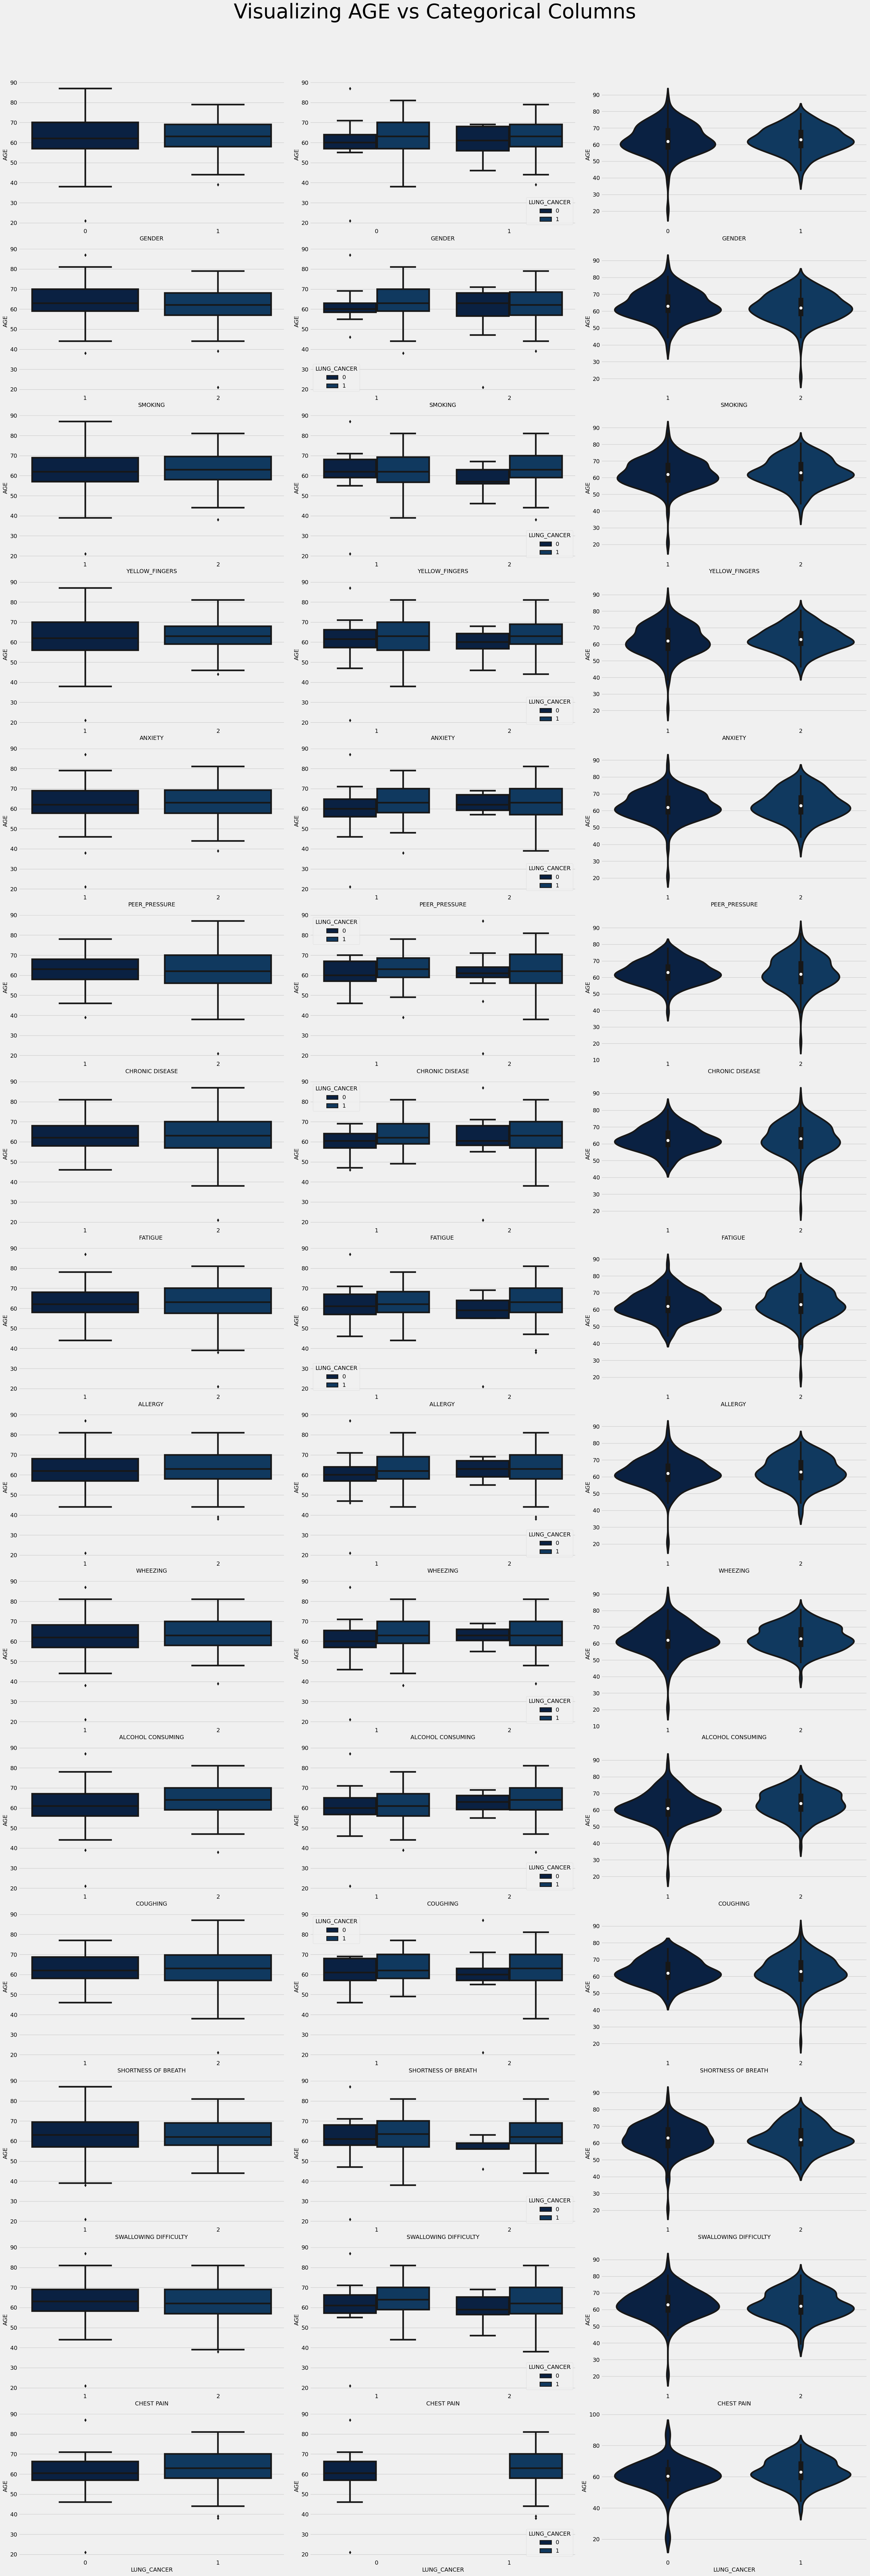

In [53]:
rows = len(cat_col)
fig,ax = plt.subplots(rows,3,figsize=(30,6*rows))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i], y=df['AGE'], ax=ax[index,0])
    sns.boxplot(x=df[i], y=df['AGE'], ax=ax[index,1], hue=df['LUNG_CANCER']) 
    sns.violinplot(x=df[i], y=df['AGE'], ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns", fontsize=50)

<Axes: >

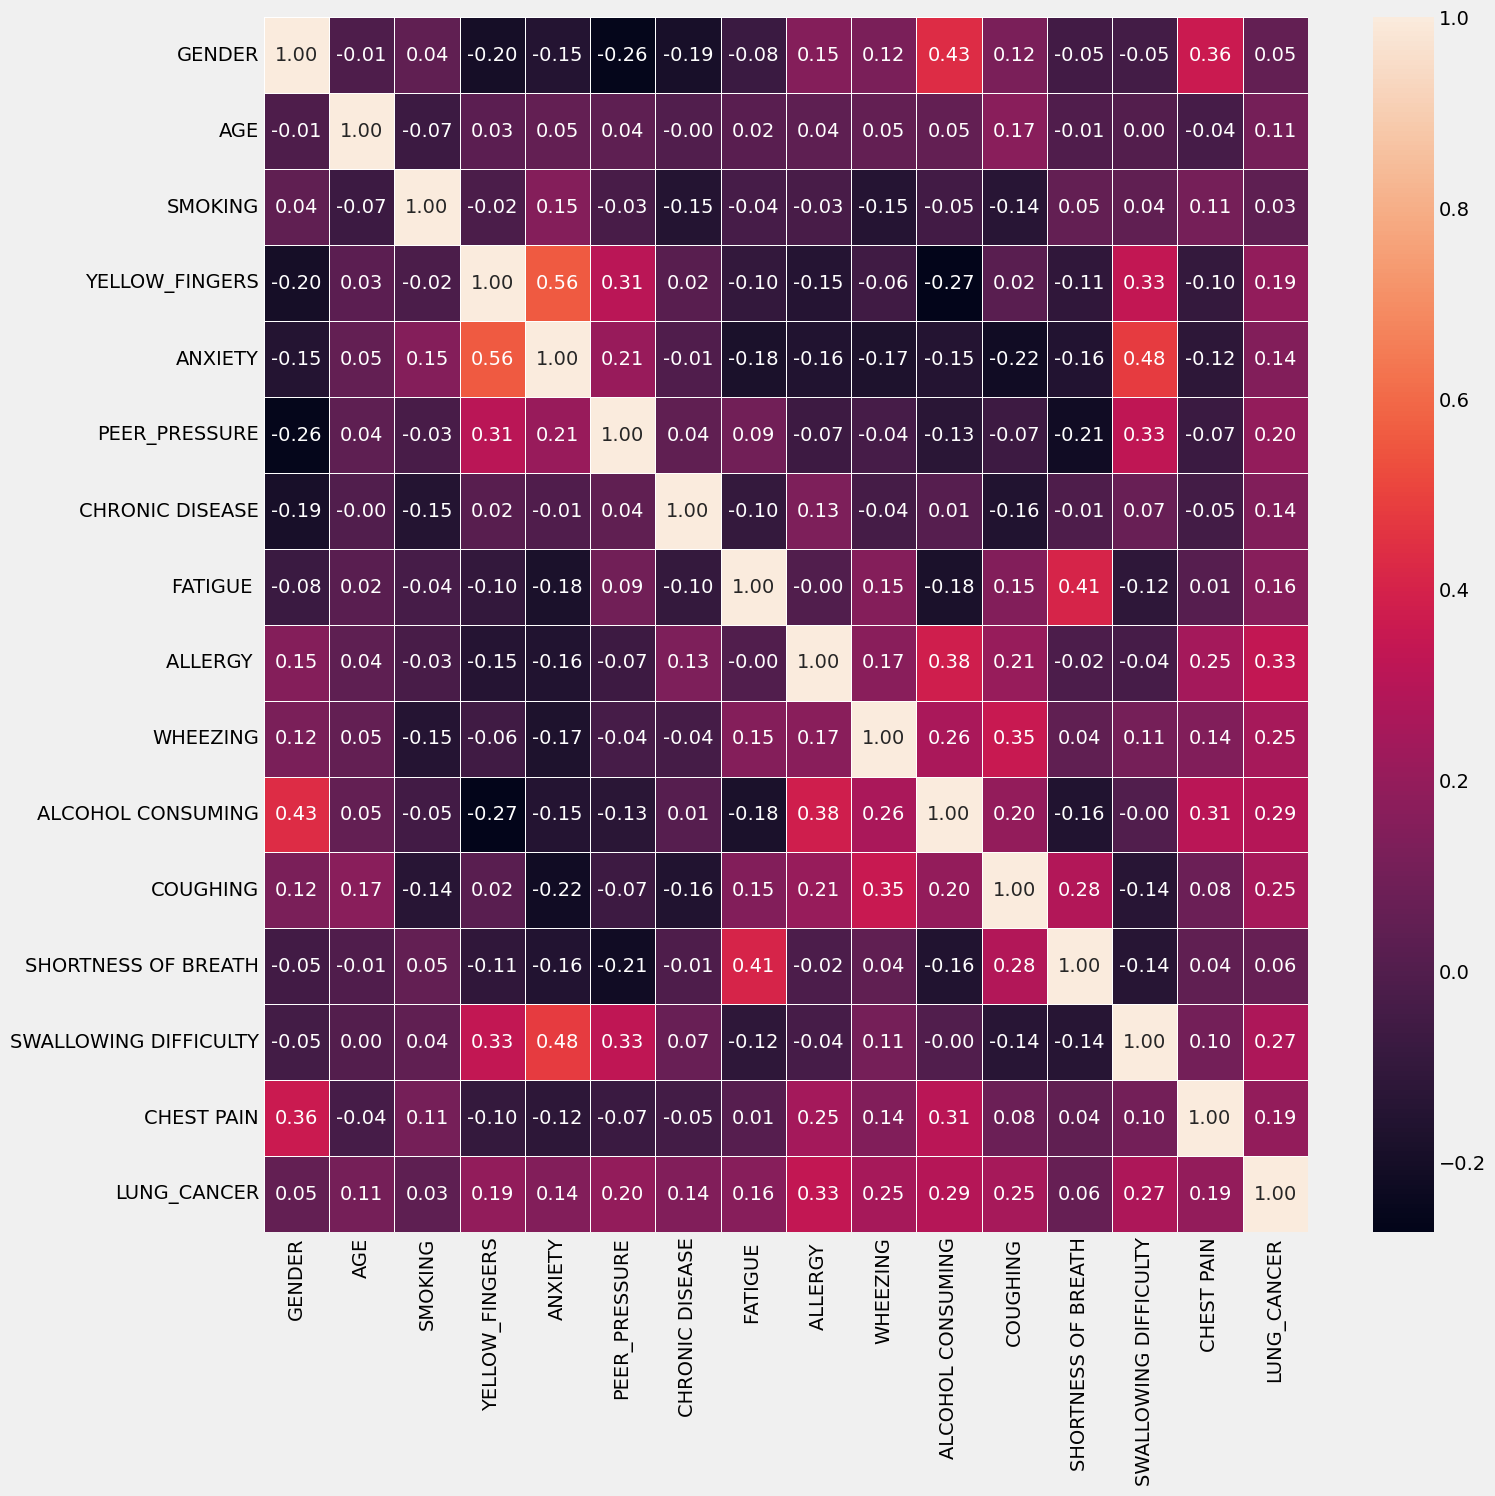

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [55]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [56]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [57]:
from imblearn.over_sampling import RandomOverSampler

# Train Test **Split**

In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train_raw, y_train_raw = X_train.copy(), y_train.copy()  
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

print(f"Train shape: {X_train.shape}\nTest shape: {X_test.shape}")

Train shape: (358, 15)
Test shape: (69, 15)


In [59]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score
tc = y_test.value_counts().sort_index()
print('Class counts (test):', tc.to_dict())
print('YES ratio (test) ≈', round((tc.get(1,0))/tc.sum(), 3))
y_pred_always_yes = np.ones_like(y_test)
print('Always-YES baseline | accuracy =', round(accuracy_score(y_test, y_pred_always_yes), 3),
      '| balanced_acc =', round(balanced_accuracy_score(y_test, y_pred_always_yes), 3))
maj = y_train.mode()[0]
y_pred_majority = np.full_like(y_test, maj)
print('Always-majority(from train) | accuracy =', round(accuracy_score(y_test, y_pred_majority), 3),
      '| balanced_acc =', round(balanced_accuracy_score(y_test, y_pred_majority), 3))


Class counts (test): {0: 10, 1: 59}
YES ratio (test) ≈ 0.855
Always-YES baseline | accuracy = 0.855 | balanced_acc = 0.5
Always-majority(from train) | accuracy = 0.145 | balanced_acc = 0.5


Scaling of AGE column

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.254996,1,1,1,1,1,0,0,0,1,0,0,1,1
1,0,0.115197,0,0,0,0,1,1,0,0,0,0,1,0,0
2,0,-0.304199,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,-1.562389,0,1,0,0,1,1,1,1,1,1,1,0,1
4,1,-0.304199,1,1,1,1,1,0,1,0,1,0,0,1,1


KNeighbors Classifier

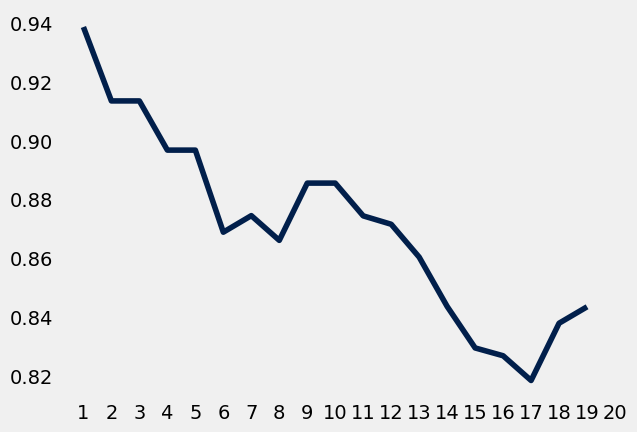

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
pre = ColumnTransformer([('age_scale', StandardScaler(), ['AGE'])], remainder='passthrough')
def make_knn_pipe(k):
    return Pipeline([('pre', pre), ('ros', RandomOverSampler(random_state=42)),
                     ('model', KNeighborsClassifier(n_neighbors=k))])

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=make_knn_pipe(k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.93      0.92      0.92        59

    accuracy                           0.87        69
   macro avg       0.74      0.76      0.75        69
weighted avg       0.88      0.87      0.87        69

Balanced Acc: 0.55
ROC AUC: 0.9
PR AUC (YES): 0.98


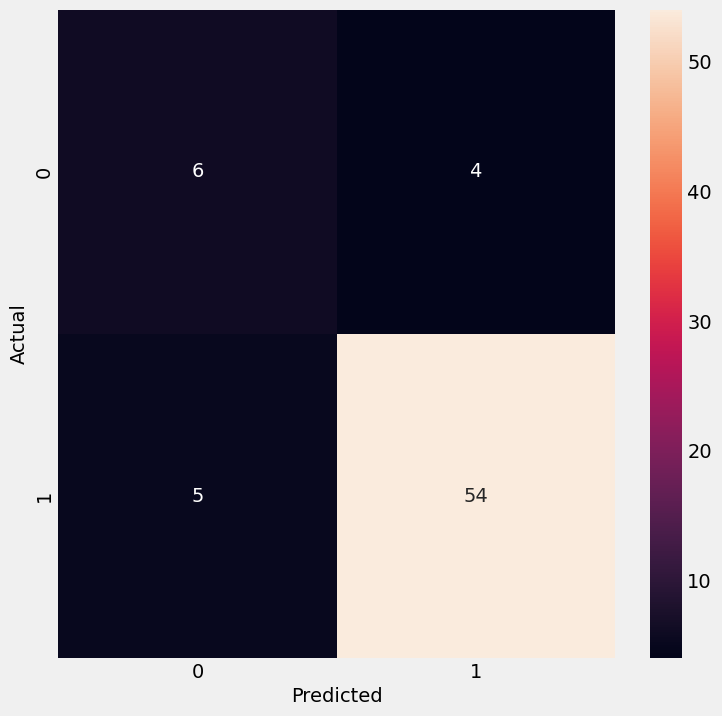

In [62]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


Support Vector Machine

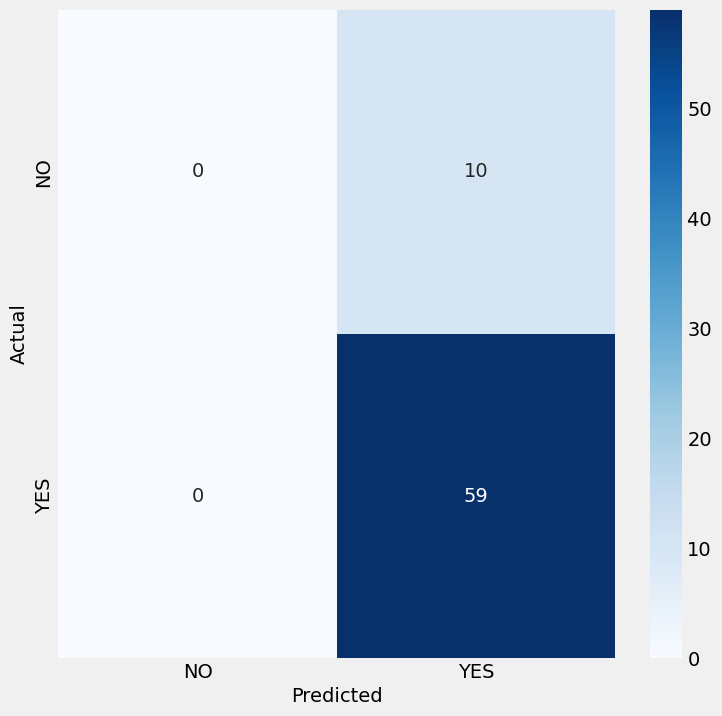

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00        10
         YES       0.86      1.00      0.92        59

    accuracy                           0.86        69
   macro avg       0.43      0.50      0.46        69
weighted avg       0.73      0.86      0.79        69


Best Parameters of SVC model is : {'gamma': 100, 'C': 100}

Balanced Acc: 0.5
ROC AUC: 0.715
PR AUC (YES): 0.919


In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score

param_grid = {'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}


rcv = RandomizedSearchCV(
    SVC(probability=True),
    param_grid,            
    cv=5,
    scoring='balanced_accuracy',  
    random_state=42        
)
rcv.fit(X_train, y_train)

y_pred_svc = rcv.predict(X_test)
confusion_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NO","YES"], yticklabels=["NO","YES"])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_svc, target_names=["NO","YES"]))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

svc_cv = rcv
try:
    svc_best = svc_cv.best_estimator_
except Exception:
    pass

print('Balanced Acc:', round(balanced_accuracy_score(y_test, y_pred_svc), 3))
try:
    proba = rcv.predict_proba(X_test)[:,1]
except Exception:
    try:
        proba = rcv.decision_function(X_test)
    except Exception:
        proba = None

if proba is not None:
    print('ROC AUC:', round(roc_auc_score(y_test, proba), 3))
    print('PR AUC (YES):', round(average_precision_score(y_test, proba), 3))



Logistic Regression

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.86      0.93        59

    accuracy                           0.88        69
   macro avg       0.78      0.93      0.82        69
weighted avg       0.94      0.88      0.90        69

Balanced Acc: 0.55
ROC AUC: 0.9
PR AUC (YES): 0.98


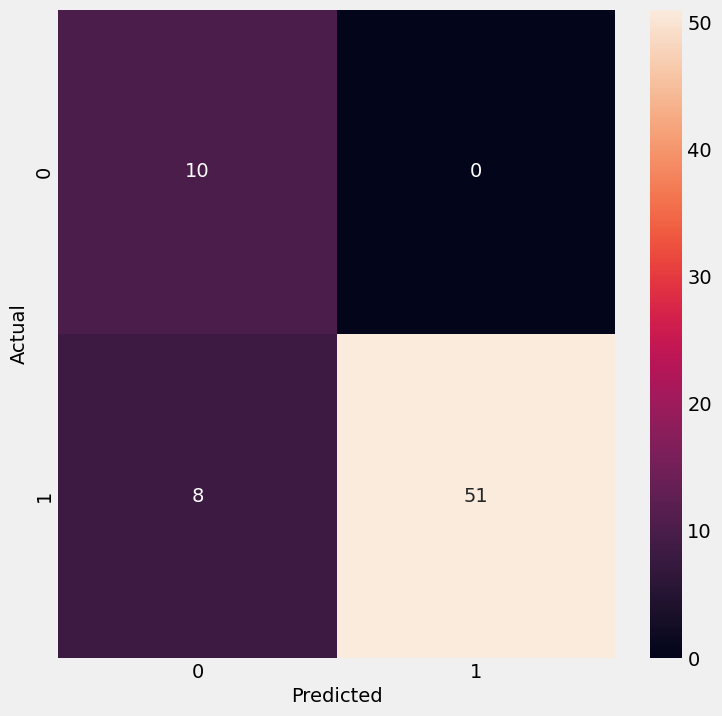

In [64]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


Random Forest

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.98      0.95      0.97        59

    accuracy                           0.94        69
   macro avg       0.87      0.92      0.89        69
weighted avg       0.95      0.94      0.94        69


Best Parameter: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Balanced Acc: 0.55
ROC AUC: 0.9
PR AUC (YES): 0.98


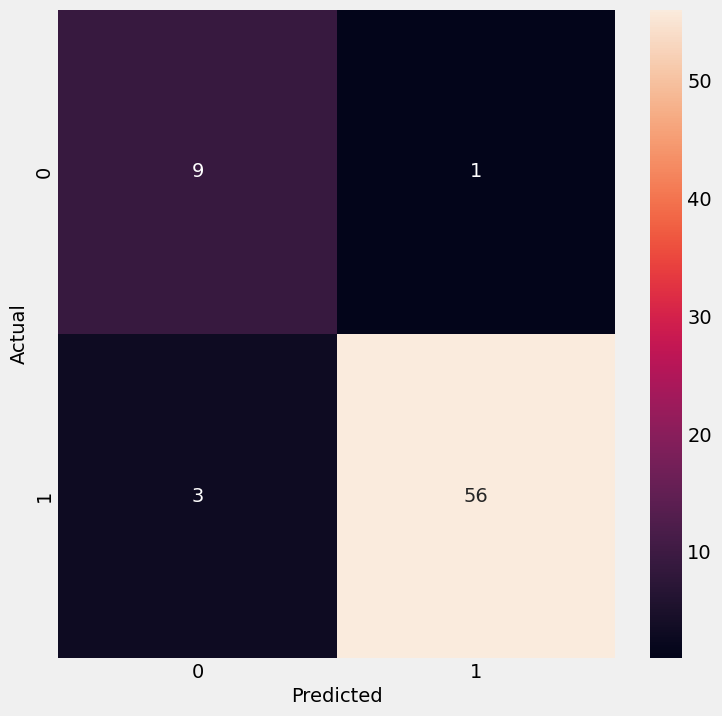

In [65]:
param_grid = {
'n_estimators': [100, 200, 400],
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

rf_cv = rcv
try:
    rf_best = rf_cv.best_estimator_
except Exception:
    pass


from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


Gradient Boosting *Classifier*

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.92      0.95      0.93        59

    accuracy                           0.88        69
   macro avg       0.77      0.72      0.74        69
weighted avg       0.88      0.88      0.88        69


Best Parameter: {'n_estimators': 200, 'learning_rate': 0.75}

Balanced Acc: 0.55
ROC AUC: 0.9
PR AUC (YES): 0.98


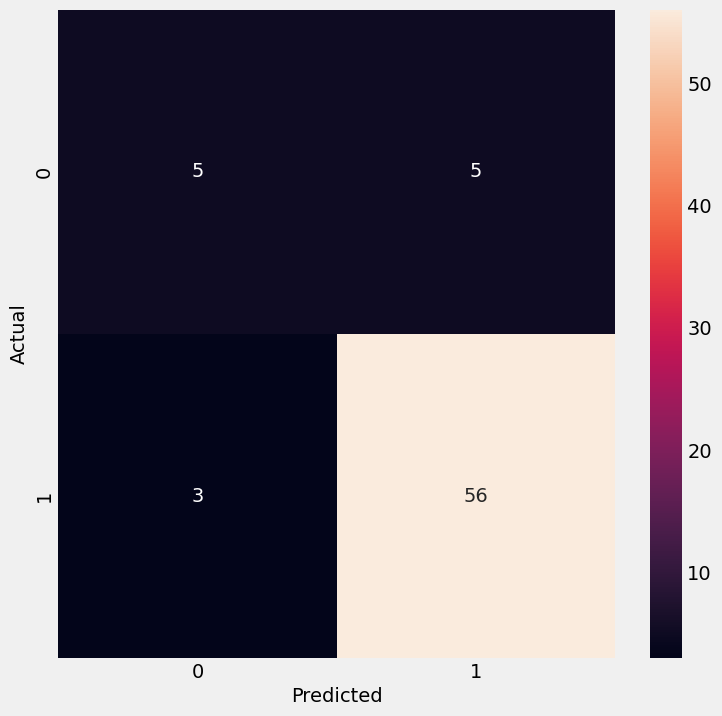

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


In [67]:
!pip install lightgbm

LGBM Classifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 179, number of negative: 179
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 358, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

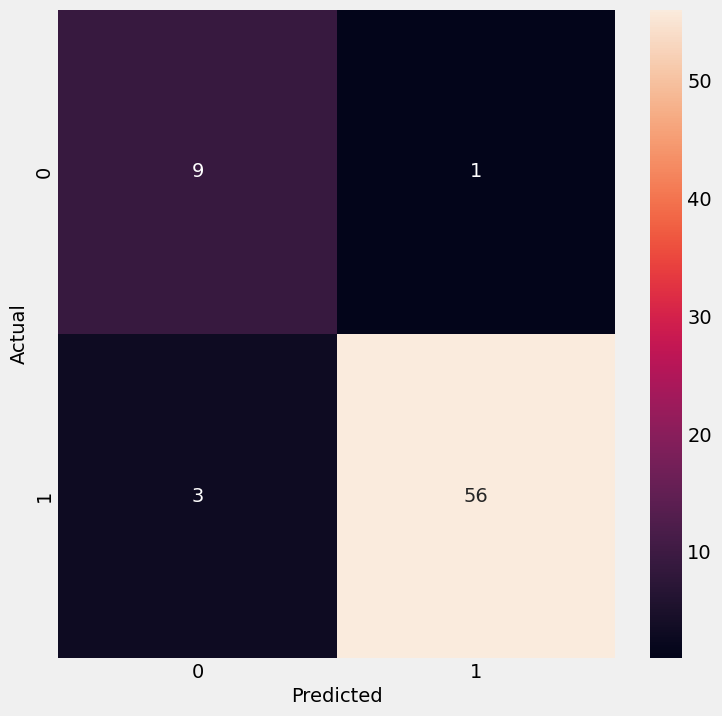

In [68]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


Selected Model - SVC



              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.87      1.00      0.93        59

    accuracy                           0.87        69
   macro avg       0.93      0.55      0.56        69
weighted avg       0.89      0.87      0.82        69

Balanced Acc: 0.55
ROC AUC: 0.893
PR AUC (YES): 0.98


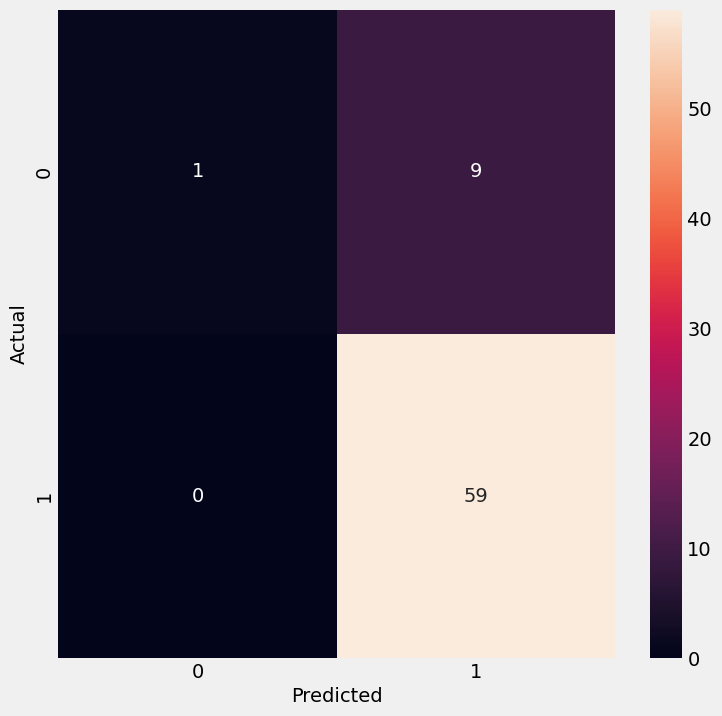

In [69]:
model = SVC(probability=True, gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, average_precision_score
_est = None
for _name in ['model','knn','svc_best','rf_best','gbc','log_reg','rcv']:
    try:
        _est = eval(_name)
        break
    except Exception:
        pass
if _est is not None:
    _yhat = _est.predict(X_test)
    print('Balanced Acc:', round(balanced_accuracy_score(y_test, _yhat), 3))
    try:
        _proba = _est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            _proba = _est.decision_function(X_test)
        except Exception:
            _proba = None
    if _proba is not None:
        print('ROC AUC:', round(roc_auc_score(y_test, _proba), 3))
        print('PR AUC (YES):', round(average_precision_score(y_test, _proba), 3))


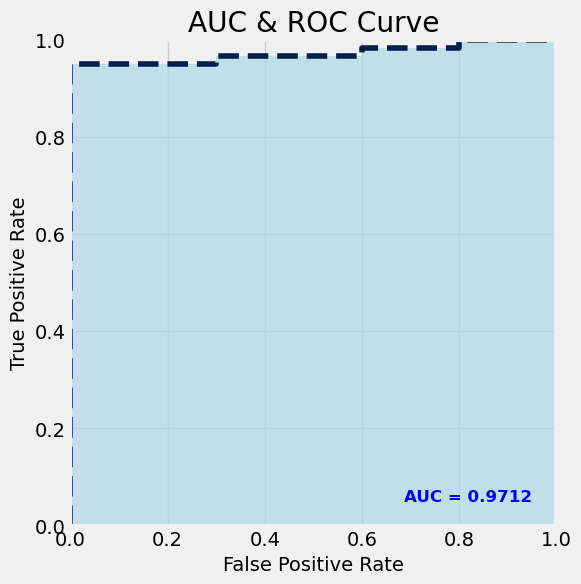

In [70]:
from sklearn import metrics
y_score = rcv.decision_function(X_test) if hasattr(rcv, "decision_function") else rcv.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_score)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_score)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Leak-safe cross‑validation with a Pipeline


In [71]:
X_train_cv, y_train_cv = X_train_raw, y_train_raw

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

pre = ColumnTransformer([('age_scale', StandardScaler(), ['AGE'])], remainder='passthrough')

cv_model = Pipeline(steps=[
    ('pre', pre),
    ('ros', RandomOverSampler(random_state=42)),
    ('model', SVC(probability=True))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_model, X_train_cv, y_train_cv, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
print(f'CV balanced accuracy (5-fold): mean={cv_scores.mean():.3f} ± {cv_scores.std():.3f}')


CV balanced accuracy (5-fold): mean=0.736 ± 0.076


In [72]:
try:
    from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
    from scipy.stats import loguniform
    param_dist = {"model__C": loguniform(1e-1, 1e3),
                  "model__gamma": loguniform(1e-3, 1e1)}
    cv_opt = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    search = RandomizedSearchCV(cv_model, param_distributions=param_dist, n_iter=30,
                                scoring="balanced_accuracy", cv=cv_opt, random_state=42,
                                n_jobs=-1, verbose=1)
    search.fit(X_train_raw, y_train_raw)
    print("Clean CV (tuned):", round(search.best_score_, 3))
    print("Best params:", search.best_params_)
    best_model = search.best_estimator_
except Exception as e:
    print('Tuning skipped:', e)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Clean CV (tuned): 0.82
Best params: {'model__C': 1.6536937182824418, 'model__gamma': 0.0024586032763280045}


In [73]:
best_model.fit(X_train, y_train)  
test_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (test_proba >= 0.5).astype(int) 

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix
print("Test BA:", round(balanced_accuracy_score(y_test, y_pred), 3),
      "| ROC AUC:", round(roc_auc_score(y_test, test_proba), 3))
print(classification_report(y_test, y_pred, target_names=["NO","YES"]))
print(confusion_matrix(y_test, y_pred))


Test BA: 0.924 | ROC AUC: 0.961
              precision    recall  f1-score   support

          NO       0.53      1.00      0.69        10
         YES       1.00      0.85      0.92        59

    accuracy                           0.87        69
   macro avg       0.76      0.92      0.80        69
weighted avg       0.93      0.87      0.88        69

[[10  0]
 [ 9 50]]
